In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/Users/josh/miniconda3/envs/compphys/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [29]:
sns.set_color_codes()
sns.set_style('ticks')

In [35]:
def exact(x):
    return 1 - (1 - np.exp(-10)) * x - np.exp(-10 * x)

In [47]:
def findDev(df):
    return np.log10(np.abs(df['Result'] - df['Exact']) / df['Exact'])

In [52]:
res10 = pd.read_table('res10.txt', delim_whitespace=True)
res100 = pd.read_table('res100.txt', delim_whitespace=True)
res1000 = pd.read_table('res1000.txt', delim_whitespace=True)
res10000 = pd.read_table('res10000.txt', delim_whitespace=True)
res100000 = pd.read_table('res100000.txt', delim_whitespace=True)

In [53]:
res10['dev'] = findDev(res10)
res100['dev'] = findDev(res100)
res1000['dev'] = findDev(res1000)
res10000['dev'] = findDev(res10000)
res100000['dev'] = findDev(res100000)

In [7]:
res10.head()

,x,Result,Exact
0,0.0000,0.0000,0.0000
1,0.0909,1.2661,0.5062
2,0.1818,1.2442,0.6559
3,0.2727,1.1101,0.6619
4,0.3636,0.9468,0.6100


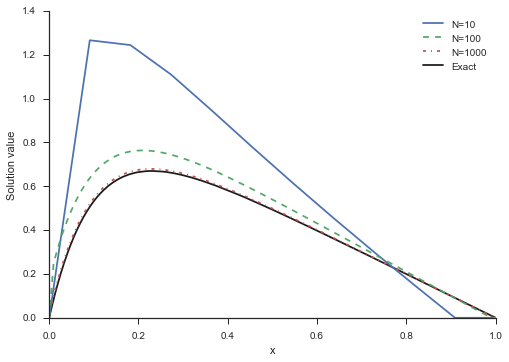

In [66]:
plt.plot(res10.x, res10.Result, 'b-', label='N=10')
plt.plot(res100.x, res100.Result, 'g--', label='N=100')
plt.plot(res1000.x, res1000.Result, 'r-.', label='N=1000')

plt.plot(res1000.x, res1000.Exact, 'k', label='Exact', zorder=0)

sns.despine()

plt.legend()
plt.xlabel('x')
plt.ylabel('Solution value')

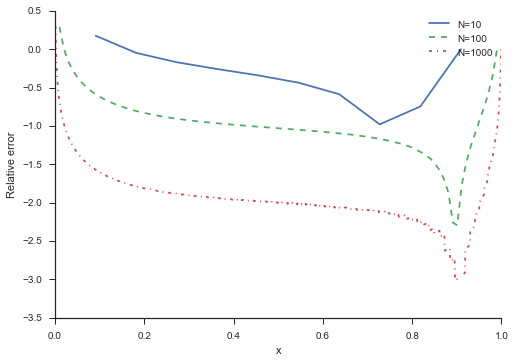

In [71]:
plt.plot(res10.x, res10.dev, 'b-', label='N=10')
plt.plot(res100.x, res100.dev, 'g--', label='N=100')
plt.plot(res1000.x, res1000.dev, 'r-.', label='N=1000')

sns.despine()

plt.legend()
plt.xlabel('x')
plt.ylabel('Relative error')